# lab 8: Linear regression with multiple predictors

## Learning Goals

- Interpreting a regression with multiple predictors
- Plotting regression results with both continuous and binary variables
- Interpret interaction effects
- Plotting the uncertainty of regression results


## Literature

ROS Ch. 10
ROS Ch. 12.1-12.4


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns



In [3]:
#For configuring plotting 

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)




<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=dc1cccf3-870b-47e6-95d7-af080098798e&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

We'll start by replicating the simple example from ROS (p.131-132). Here we can get the data direct from the [book website](https://avehtari.github.io/ROS-Examples/), but for convenience, I have saved a copy to the course website:  

In [4]:
iq = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/iq.csv")

In [5]:
iq

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


Initially, we want to fit a simple regression model of a child's test score on the binary variable of whether the child's mother has a high school education or not. 

In [6]:
mod1 = smf.ols(formula = "kid_score~mom_hs", data=iq).fit()
a_hat = mod1.params[0]
b_hat = mod1.params[1]

print(a_hat, b_hat)

x_line = np.linspace(0,1,100)
y_line = a_hat + b_hat*x_line

77.5483870967742 11.771260997067483




Below is a replication of the chart in the book using the seaborn function, stripplot. The "jitter" option creates some random horizontal space so it is easier to see the distribution of the data.  

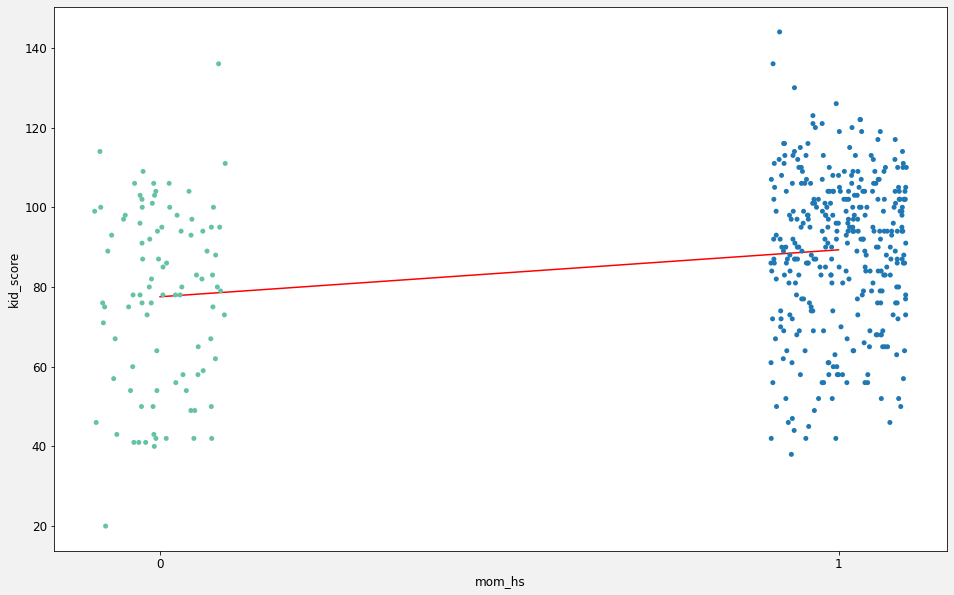

In [7]:
fig, ax = plt.subplots()
sns.stripplot(x='mom_hs', y='kid_score', data=iq, jitter=True, ax=ax)
ax.plot(x_line, y_line, color="red")

The interpretation of the regression coefficients are straightforward. The intercept gives the average of the kids' scores when their mothers do not have a high school education. The $\hat{b}$ parameter tells us how much extra, on average, a child scores when the mother has a high school education. 

We can then also run a simple regression on a continuous predictor: The mother's IQ

In [8]:
mod2 = smf.ols(formula="kid_score~mom_iq", data=iq).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           7.66e-23
Time:                        07:39:47   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7998      5.917      4.360      0.000      14.169      37.430
mom_iq         0.6100      0.059     10.423      0.000       0.495       0.725
==============================================================================
Omnibus:                        7.545   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.735
Skew:                          -0.324   Prob(JB):                       0.0209
Kurtosis:                       2.919   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

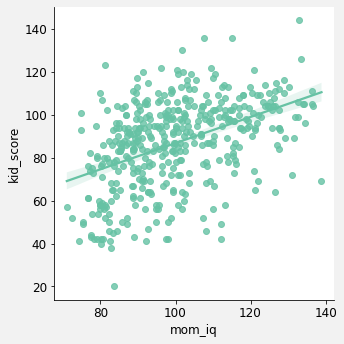

In [9]:
sns.lmplot(x="mom_iq", y="kid_score", data=iq)

With a continuous predictor, the intercept is more difficult to interpret. Literally, it would say that if the mothers iq was 0, then the model would predict the child's test score to be 25.8. But this is rather non-sensical since the mother's iq variable only goes as low as about 70. This can be one good reason to de-mean (subtract the mean) from the variables before regressing. 

The slope, $\hat{b}$ estimate is more straightforward. This says that a point increase in the mothers iq is associated with a .61 increase in the child's test score, on average. 

Now let's have both predictors in a model: 

In [10]:
mod3 = smf.ols("kid_score~mom_iq + mom_hs", data=iq).fit()

In [11]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.79e-23
Time:                        07:39:48   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7315      5.875      4.380      0.000      14.184      37.279
mom_iq         0.5639      0.061      9.309      0.000       0.445       0.683
mom_hs         5.9501      2.212      2.690      0.007       1.603      10.297
==============================================================================
Omnibus:                        7.327   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.530
Skew:                          -0.313   Prob(JB):                       0.0232
Kurtosis:                       2.845   Cond. No.                         683.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the model with both becomes a bit more tricky. Let's try to chart the model results first

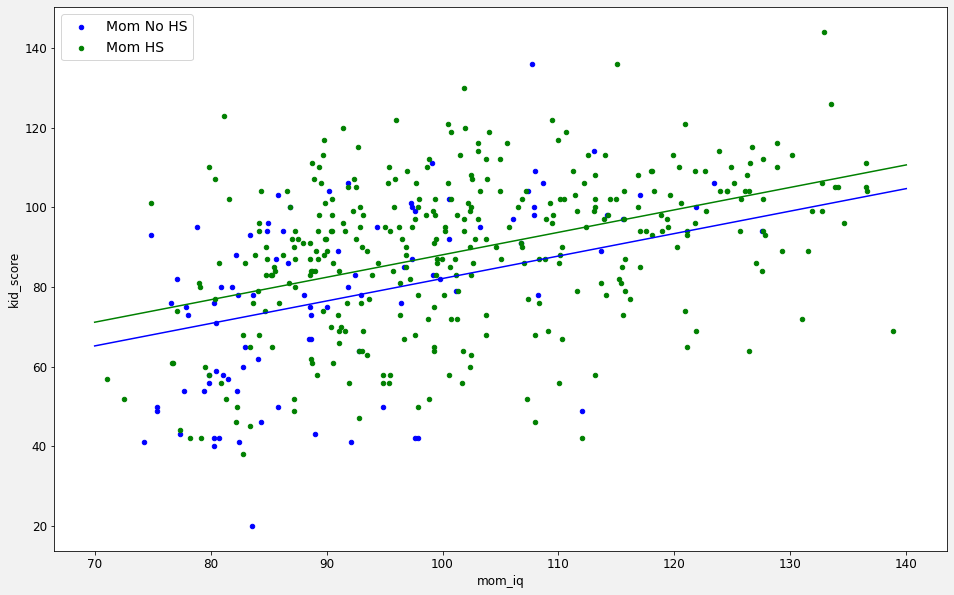

In [12]:
a_hat = mod3.params[0]
b1_hat = mod3.params[1]
b2_hat = mod3.params[2]

x_line = np.linspace(70,140,200)
y_line_noHS = a_hat + b1_hat*x_line
y_line_HS = a_hat + b1_hat*x_line + b2_hat

fig, ax = plt.subplots()
iq.loc[iq.mom_hs==0].plot.scatter("mom_iq", "kid_score", label="Mom No HS", color="blue", ax=ax)
iq.loc[iq.mom_hs==1].plot.scatter("mom_iq", "kid_score", label="Mom HS", color="green", ax=ax)
ax.plot(x_line,y_line_noHS, color="blue")
ax.plot(x_line,y_line_HS, color="green")



The two lines above represent the association between mom's iq and kid's score for the cases where the mom has and does not have a high school education. 

With this model we could compare to individuals, both with mothers with the same IQ, but one where the mother has a high school education. On average, we would, under this model, expect the child with a high school educated mother to score, on average 5.9 points higher on the exam. 

# Interactions

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=9edb0838-754d-467c-9726-af080098797d&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Let's use the seaborn lmplot function to plot the data with regressions, grouping the variables by whether the mother was high school educated. 

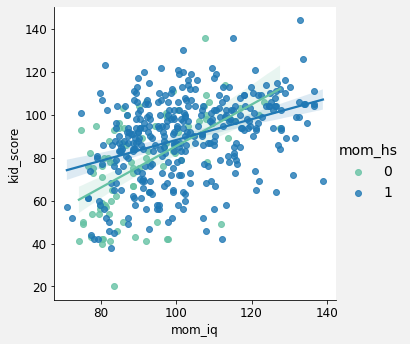

In [13]:
sns.lmplot(x="mom_iq", y="kid_score", hue="mom_hs", data=iq)

What has happened behind the scenes here is that **seperate** regressions were run for both the data where the mother was high-school educated and where she wasn't. The results are then plotted. Why does this look so different than the multiple regression we ran above? 

The key here is to see that the slopes of the two lines appear to be different. The regression we ran above had an implicit assumption that the slopes of the two categories were the same. In order to allow for different slopes for the two categories of data we need to include an **interaction**. The regression equation we want to estimate becomes: 

$$kid\_score_i = b_0 + b_1 mom\_hs_i + b_2 mom\_hs_i + b_3 mom\_hs \times mom\_iq_i + \epsilon_i$$


In [14]:
mod4 = smf.ols("kid_score~mom_iq + mom_hs + mom_iq:mom_hs", data=iq).fit()

We could also use the short-hand:

In [15]:
mod4 = smf.ols("kid_score~mom_iq*mom_hs", data=iq).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.07e-24
Time:                        07:39:52   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.4820     13.758     -0.835      0.404     -38.523      15.559
mom_iq            0.9689      0.148      6.531      0.000       0.677       1.260
mom_hs           51.2682     15.338      3.343      0.001      21.122      81.414
mom_iq:mom_hs    -0.4843      0.162     -2.985      0.003      -0.803      -0.165
==============================================================================
Omnibus:                        8.014   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.258
Skew:                          -0.333   Prob(JB):                       0.0161
Kurtosis:                       2.887   Cond. No.                     3.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

when we write *mom_iq*mom_hs*, statsmodels will automatically add both the **main effects** and the interaction effect to the regression. 

Now let's plot our results

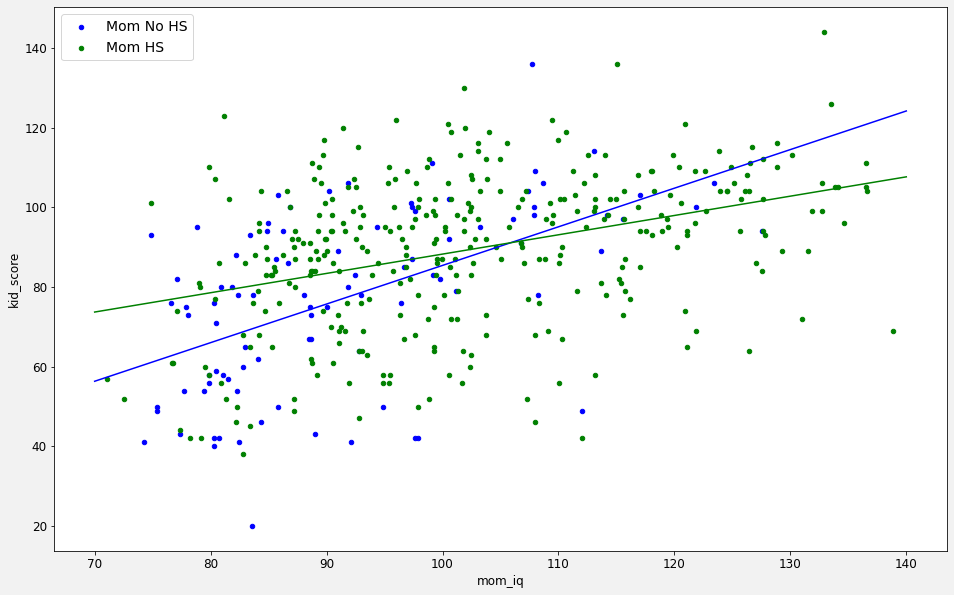

In [15]:
b0_hat = mod4.params[0]
b1_hat = mod4.params[1]
b2_hat = mod4.params[2]
b3_hat = mod4.params[3]

x_line = np.linspace(70,140,200)
y_line_noHS = b0_hat + b1_hat*x_line

y_line_HS = (b0_hat + b2_hat) + (b1_hat + b3_hat)*x_line

fig, ax = plt.subplots()
iq.loc[iq.mom_hs==0].plot.scatter("mom_iq", "kid_score", label="Mom No HS", color="blue", ax=ax)
iq.loc[iq.mom_hs==1].plot.scatter("mom_iq", "kid_score", label="Mom HS", color="green", ax=ax)
ax.plot(x_line,y_line_noHS, color="blue")
ax.plot(x_line,y_line_HS, color="green")




Now we can interpret the regression coefficinets. 

$b_0$ and $b_1$  (I drop the $\hat{}$ notation - just assume we are talking about the estimates now) are the intercept and slope of the line for the relationship between test score and mom's iq for children with mothers without a high school education. Again, giving an interpretation to $b_0$ is quite meaningless when the actual values of mom_iq do not get close to zero. 

The sum ($b_0 + b_2$) can be interpreted as the intercept of the relationship between mom's iq and the kids's score for children with a high-school educated mother. 

The sum ($b_1 + b_3)$ is the slope of this line. Thus the interaction effect ($b_3$) can be interpreted as the increase/decrease in the slope for children with high-school educated mothers. 

### Using a "real" data set. 

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=bc463e03-4880-42d6-abef-af0800987981&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

To get some more practice  working through some of the concepts in linear regression with multiple predictors, we will introduce a new, full dataset with quite a bit more complexity. 

We can download from the course website:

In [6]:
pv = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/pv_csi_new.csv", index_col=0)

This data provides information on all roof-top solar installations in California between 2007-2014. The data is from the "California Solar Iniative"

We can also look at a list of the variables/columns along with the data type of the columns

In [4]:
pv.dtypes

manufacturer                object
csi_id                      object
csi_complete                object
prog_administrator          object
program                     object
csi_cost                   float64
incentive_design            object
nameplate                  float64
incentive_type              object
sector                      object
csi_rating                 float64
cec_ptc_rating             float64
incentive_step              object
incentive_amount           float64
incentive_app_status        object
MASH_1A                    float64
MASH_1B                    float64
MASH_2                     float64
contractor                  object
contractor_id                int64
csi_3rd_party               object
city                        object
county                      object
state                       object
zip                          int64
month                        int64
year                         int64
cost_per_kw                float64
year_totals         

### Working with dates

Above, we can see that the "date" variable--the date of finished installation--is listed as "object", which basically means that Python/pandas recognizes it as a text. We would like to indicate that this is a date variable. This will make everything from charting to modelling much easier. 

In [5]:
pv.date

1         2014-01-20
2         2013-12-05
3         2013-12-13
4         2014-03-05
5         2014-02-25
             ...    
106547    2014-08-15
106548    2013-06-06
106549    2013-06-12
106550    2014-06-23
106551    2014-06-30
Name: date, Length: 106551, dtype: object

In [6]:
pv["date"] = pd.to_datetime(pv.date, format="%Y-%m-%d")

Above, we tell pandas to recognize the date columns as a date, and indicate the format of the date. You can read more about dates in pandas in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

Now let's order the data set by date: 

In [7]:
pv = pv.sort_values("date")

Let us look at the variable for cost per kw (kilowatt, a measure of generation capacity) of the solar power systems. We will chart the data over time: 

(0.0, 20000.0)

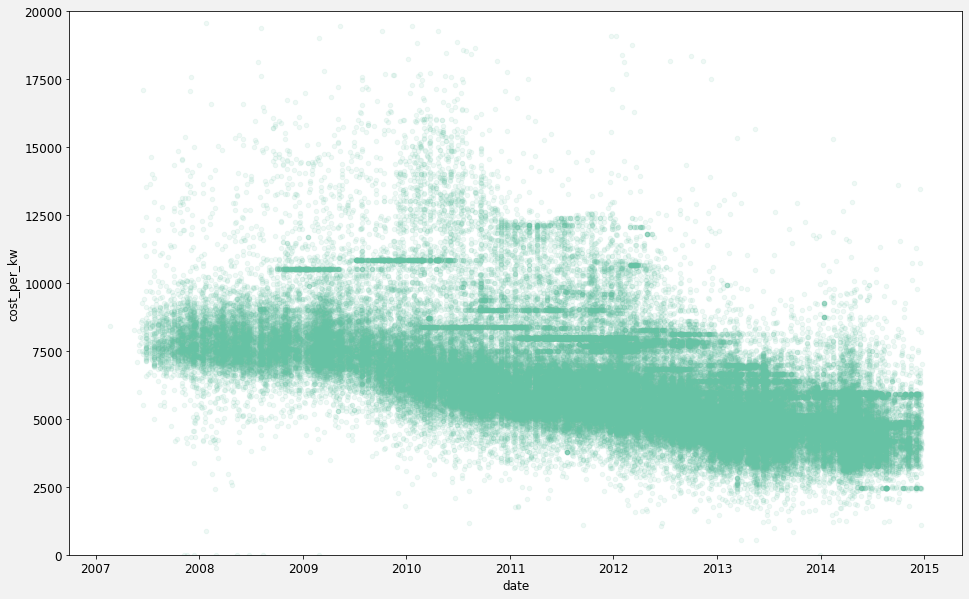

In [8]:
fig, ax = plt.subplots()
pv.plot.scatter("date", "cost_per_kw",alpha=.1, ax=ax)
ax.set_ylim(0,20000)

We see that there is a lot of variation, but that there seems to be an important time component. We could first take a regression with a time component in order to get an estimate of an overall time trend: 

Using dates directly in a regression generally doesn't work very well, but we also have the variable *time_days*, which is the number of days since the first data point (2007-02-20).

In [9]:
mod1 = smf.ols("cost_per_kw~time_days", data=pv).fit()

In [10]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                 5.287e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:44:46   Log-Likelihood:            -9.4192e+05
No. Observations:              106551   AIC:                         1.884e+06
Df Residuals:                  106549   BIC:                         1.884e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9467.8113     15.208    622.547      0.000    9438.003    9497.619
time_days     -1.8202      0.008   -229.945      0.000      -1.836      -1.805
==============================================================================
Omnibus:                   164379.725   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        571053178.058
Skew:                           9.018   Prob(JB):                         0.00
Kurtosis:                     361.191   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can interpret the slope parameter here quite literally: the average cost of a solar power system fell by about 1.8 dollars per day over our study period. 

At time 0 (the time of the first installation), the cost_per_kw was 9467 dollars.



In [11]:
import datetime

#This whole block is so that we can keep the date-labels on the chart we make below: 
T = 2922 # number of days


base = datetime.date(2007, 1, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(T)]
fake_dates = pd.to_datetime(pd.Series([date.strftime("%Y-%m-%d") for date in date_list]))



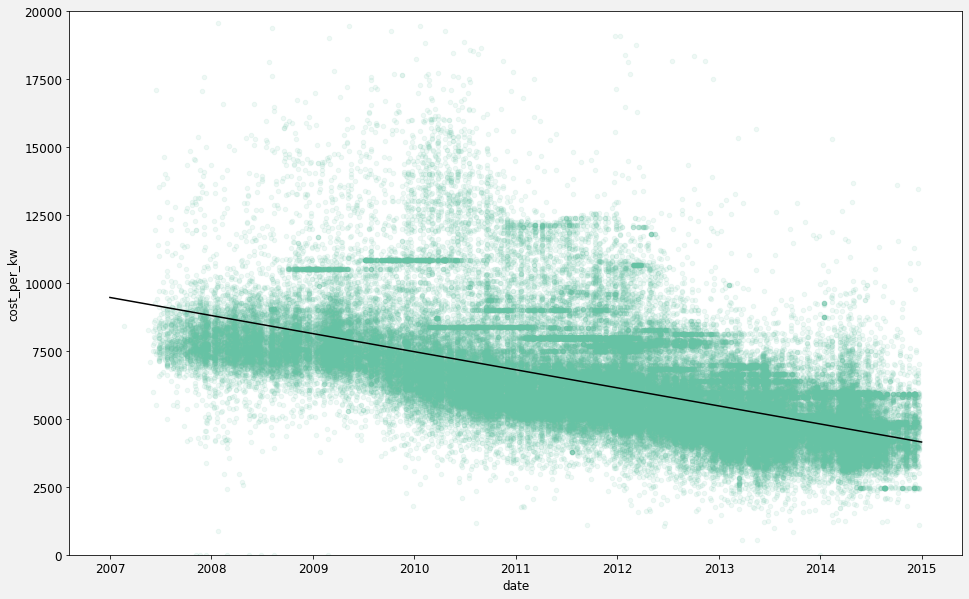

In [12]:

x_line = np.linspace(0 , T, T)
y_line = mod1.params[0] + mod1.params[1]*x_line

fig, ax = plt.subplots()
pv.plot.scatter("date", "cost_per_kw", alpha=.1, ax=ax)
ax.set_ylim(0,20000)
ax.plot(fake_dates, y_line, color="black")

One change we can do is that as we add complexity to the model, it will be useful use a de-meaned time trend. This allows us to interpret the other coefficients holding time to be at the mid-point of our analysis



In [13]:
pv["time_days_m"] = pv.time_days - np.mean(pv.time_days)

We also have an indicator variable, *china* in our data, which indicates whether the solar power system used chinese produced panels. We can introduce that in our regression: 

In [14]:
mod2 = smf.ols("cost_per_kw~time_days_m + china", data=pv).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                 2.661e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:44:55   Log-Likelihood:            -9.2773e+05
No. Observations:              104992   AIC:                         1.855e+06
Df Residuals:                  104989   BIC:                         1.856e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6267.0085      6.247   1003.157      0.000    6254.764    6279.253
time_days_m    -1.7324      0.009   -198.668      0.000      -1.750      -1.715
china        -315.4043     12.485    -25.262      0.000    -339.876    -290.933
==============================================================================
Omnibus:                   163523.573   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        597023260.551
Skew:                           9.191   Prob(JB):                         0.00
Kurtosis:                     371.965   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The way we could interpret the coefficients above are to say that at any given time, a system made of chinese-made panels was about 315 dollars dollars. We can plot: 

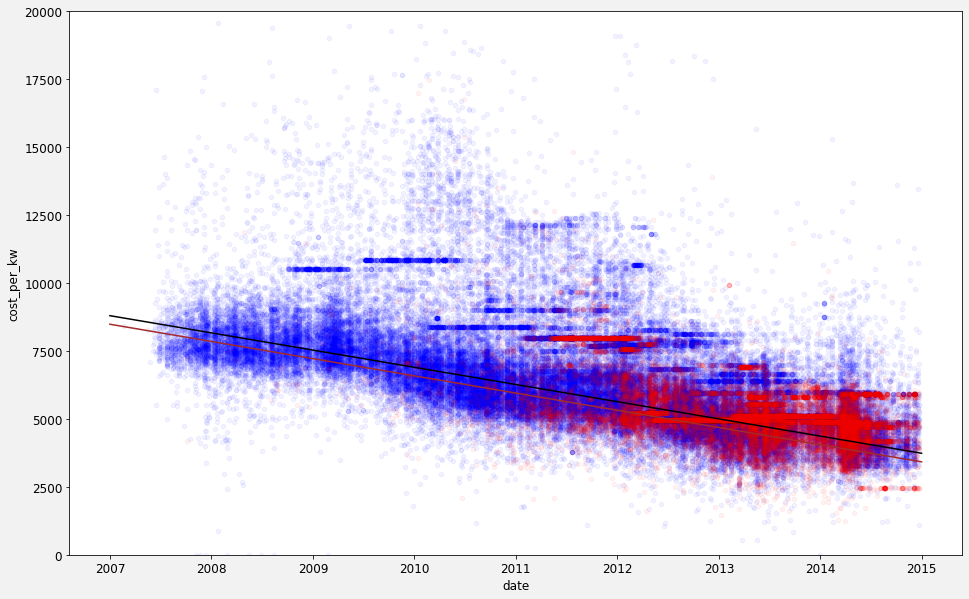

In [15]:


x_line = np.linspace(0 , T, T)
x_line_m = x_line - np.mean(x_line)
y_line = mod2.params[0] + mod2.params[1]*x_line_m
y_line_china = mod2.params[0] + mod2.params[1]*x_line_m + mod2.params[2]



fig, ax = plt.subplots()
pv.loc[pv.china==0].plot.scatter("date", "cost_per_kw", alpha=.05, color="blue", ax=ax)
pv.loc[pv.china==1].plot.scatter("date", "cost_per_kw", alpha=.05, color="red", ax=ax)
ax.set_ylim(0,20000)
ax.plot(fake_dates, y_line, color="black")
ax.plot(fake_dates, y_line_china, color="brown")

We might, correctly, wonder whether this model should have an interaction effect with the time trend - that is allowing for different slopes for lines with and without chinese-made panels

In [16]:
mod3 = smf.ols("cost_per_kw~time_days_m*china", data=pv).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.775e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:45:18   Log-Likelihood:            -9.2772e+05
No. Observations:              104992   AIC:                         1.855e+06
Df Residuals:                  104988   BIC:                         1.855e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6264.3207      6.268    999.483      0.000    6252.036    6276.605
time_days_m          -1.7485      0.009   -189.166      0.000      -1.767      -1.730
china              -367.3554     15.947    -23.036      0.000    -398.611    -336.100
time_days_m:china     0.1458      0.028      5.236      0.000       0.091       0.200
==============================================================================
Omnibus:                   163535.633   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        596789245.227
Skew:                           9.192   Prob(JB):                         0.00
Kurtosis:                     371.892   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we note that the interaction effect is positive -- the slope of the trend for chinese panels is less negative: 

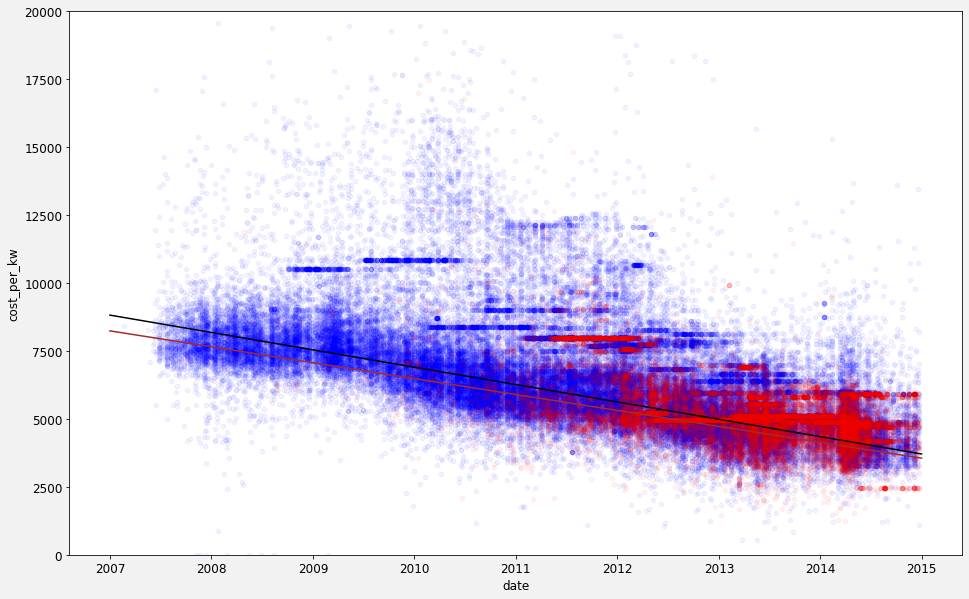

In [17]:
x_line = np.linspace(0 , T, T)
x_line_m = x_line - np.mean(x_line)
y_line = mod3.params[0] + mod3.params[1]*x_line_m
y_line_china = mod3.params[0] + mod3.params[2] + (mod3.params[1] + mod3.params[3])*x_line_m 



fig, ax = plt.subplots()
pv.loc[pv.china==0].plot.scatter("date", "cost_per_kw", alpha=.05, color="blue", ax=ax)
pv.loc[pv.china==1].plot.scatter("date", "cost_per_kw", alpha=.05, color="red", ax=ax)
ax.set_ylim(0,20000)
ax.plot(fake_dates, y_line, color="black")
ax.plot(fake_dates, y_line_china, color="brown")

## Indicator variables

In our data we have a variable called "sector", which indicates which sector hosts the solar panel system - there are four options: 

In [18]:
np.unique(pv.sector)

array(['Commercial', 'Government', 'Non-Profit', 'Residential'],
      dtype=object)

We include sector in our formula: 

In [19]:
mod4 = smf.ols("cost_per_kw~time_days_m*china + sector", data=pv).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     8953.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:45:22   Log-Likelihood:            -9.2757e+05
No. Observations:              104992   AIC:                         1.855e+06
Df Residuals:                  104985   BIC:                         1.855e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6027.1166     41.558    145.028      0.000    5945.663    6108.570
sector[T.Government]   1590.6131     98.156     16.205      0.000    1398.228    1782.998
sector[T.Non-Profit]   -304.4859     96.484     -3.156      0.002    -493.593    -115.379
sector[T.Residential]   237.7904     41.838      5.684      0.000     155.789     319.792
time_days_m              -1.7488      0.009   -189.432      0.000      -1.767      -1.731
china                  -364.6179     15.925    -22.895      0.000    -395.831    -333.404
time_days_m:china         0.1429      0.028      5.138      0.000       0.088       0.197
==============================================================================
Omnibus:                   163769.442   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        603402067.653
Skew:                           9.218   Prob(JB):                         0.00
Kurtosis:                     373.933   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we include an indicator variable such as *sector*, what statsmodels does behind the scenes is to create three new binary (or "dummy") variables. However, one category/indicator is omitted. In our case above, we see that will be "commercial". "commercial" basically gets absorbed into the intercept, and is now the comparison value. 

So the coefficient on the *Government* indicator is 1590. This means that on average for solar panel systems built at the same time, a solar panel system built on a government building cost 1590 dollars more than a comparable system on a commercial building. 

### Non-linear time trend

One assumption we have made above that may be questionable is that the time trend is linear. Looking at the data above, that is not completly obviously the best model. A relatively simple change would be to add a quadratic time trend to our model. So we would have a model that looks like: 

$$cost\_per\_kw_i = b_0 t_i + b_0 t^2_i + X B + \epsilon_i$$

For our quadratic time trend we have just added a squared time term in addition to our other variables which we represent by the matrix X



In [20]:
#Create the quadratic term
pv["time_days_m_sq"] = pv.time_days_m**2

To simplify, we do not include an interaction between the trend terms and china in this regression

In [21]:

mod5 = smf.ols("cost_per_kw~time_days_m + time_days_m_sq", data=pv).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:45:26   Log-Likelihood:            -9.4162e+05
No. Observations:              106551   AIC:                         1.883e+06
Df Residuals:                  106548   BIC:                         1.883e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6290.8428      6.985    900.577      0.000    6277.152    6304.534
time_days_m       -1.9218      0.009   -215.208      0.000      -1.939      -1.904
time_days_m_sq    -0.0003   1.14e-05    -24.333      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   165044.969   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        591611598.739
Skew:                           9.087   Prob(JB):                         0.00
Kurtosis:                     367.591   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The squared term is small but negative, which suggests that the fall in prices accelerated over time. It is easier to see the effect of a quadratic time trend visually

In [22]:
mod5.params

Intercept         6290.842783
time_days_m         -1.921825
time_days_m_sq      -0.000277
dtype: float64

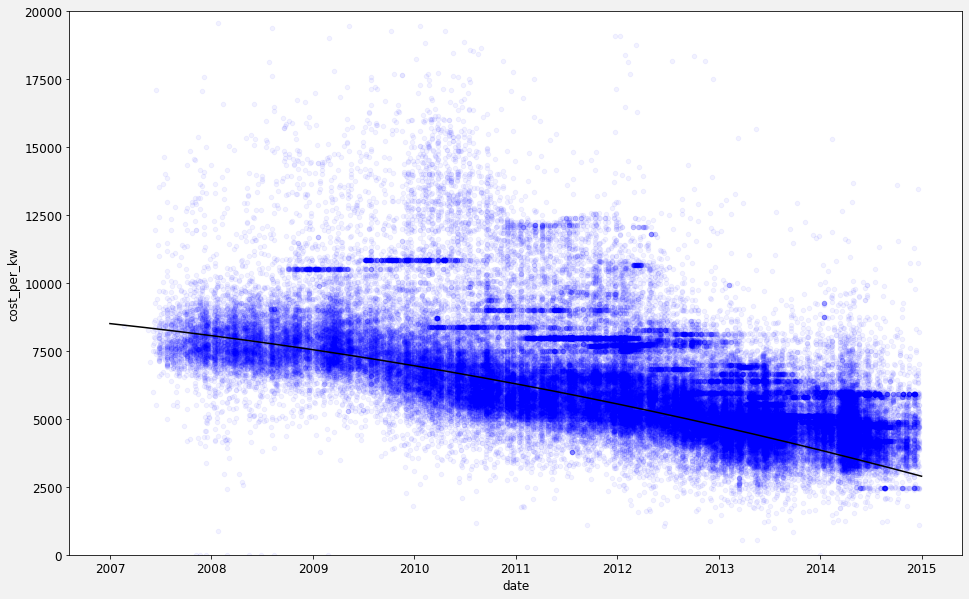

In [37]:
x_line = np.linspace(0 , T, T)
x_line_m = x_line - np.mean(x_line)
y_line = mod5.params[0] + mod5.params[1]*x_line_m + mod5.params[2]*x_line_m**2

fig, ax = plt.subplots()
pv.plot.scatter("date", "cost_per_kw", alpha=.05, color="blue", ax=ax)
ax.set_ylim(0,20000)
ax.plot(fake_dates, y_line, color="black")

One warning about quadratic terms is that they tend to lead to poor out-of-sample predictions. So if were to use the above model to make a prediction about a solar power plant in 2016, the quadratic model could lead to a particularly bad result

### Simulation and visualisation of uncertainty and plotting data

For representing the uncertainty of a simple linear predictor, we can make use of the standard error of the estimate. But there is no easy way to represent the uncertainty in quadratic trend line based purely on the two standard errors of the estimates. Instead we can use simulation to represent our uncertainty. (We will go in more detail about representing uncertainty in the next lab).


<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=4825f8e8-5b57-4138-940e-af0800987982&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

#### Inferential uncertainty

First we look at what we call the covariance matrix, which gives us the estimated variances and covariances between our variables. We'll estimate the standard errors of the linear and squared time terms

In [47]:

nmk = mod5.df_resid #n-k
sigma_hat = np.sqrt(mod5.mse_resid)
bs_vcov = mod5.cov_params(scale=1) # scale=1, unscaled covariance matrix
#bs_vcov = mod5.cov_params() # scaled
bs = mod5.params
bs_vcov

,Intercept,time_days_m,time_days_m_sq
Intercept,1.757302e-05,-7.169207e-09,-1.957946e-11
time_days_m,-7.169207e-09,2.871991e-11,1.714360e-14
time_days_m_sq,-1.957946e-11,1.714360e-14,4.682003e-17


Below we will go through one run of simulating the uncertainty.

First we generate a value for sigma (more on the details of this in the next lab): 

In [48]:
sigma_sim = sigma_hat*np.sqrt((nmk/np.random.chisquare(nmk,1)))


Then we generate a simulation of the variance-covariance matrix

In [49]:
V_sim = np.array(bs_vcov) * sigma_sim**2

In [50]:
V_sim

array([[ 4.88435361e+01, -1.99265310e-02, -5.44203449e-05],
       [-1.99265310e-02,  7.98258711e-05,  4.76499760e-08],
       [-5.44203449e-05,  4.76499760e-08,  1.30134449e-10]])

We then generate simulations of the coefficients assuming that they are from a multivariate normal distribution

In [51]:
beta_sim = np.random.multivariate_normal(bs, V_sim, 1)

In [52]:
beta_sim

array([[ 6.29423519e+03, -1.92814942e+00, -2.84148306e-04]])

Now we take the above steps and put them in a function, which we can then call multiple times to create a set of simulations

In [53]:
def regSim(regMod): 
    #extract values from regression model
    nmk = regMod.df_resid #n-k
    sigma_hat = np.sqrt(regMod.mse_resid/nmk)
    bs_vcov = regMod.cov_params()
    bs = regMod.params
    
    sigma_sim = sigma_hat*np.sqrt((nmk/np.random.chisquare(nmk,1)))
    V_sim = np.array(bs_vcov) * sigma_sim**2
    beta_sim = np.random.multivariate_normal(bs, V_sim, 1)
    
    return(beta_sim.flatten())



    


In [54]:
#we create 50 simulations
nsim = 50

beta_sims = []
sigma_sims = []

for s in range(nsim):
    beta_sims.append(regSim(mod5))
    

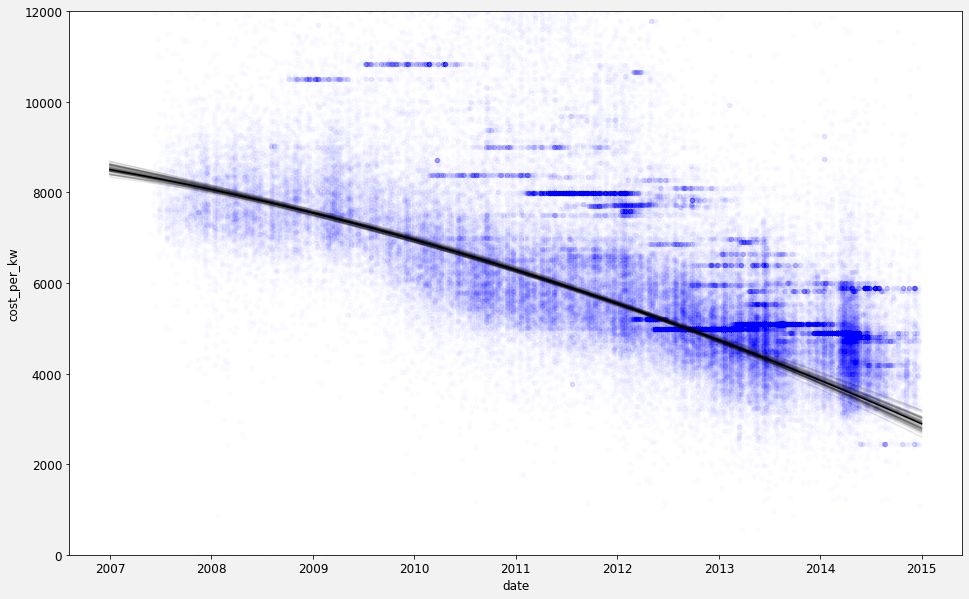

In [55]:
fig, ax = plt.subplots()
pv.plot.scatter("date", "cost_per_kw", alpha=.01, color="blue", ax=ax)
ax.set_ylim(0,12000)
ax.plot(fake_dates, y_line, color="black")


for i in range(nsim):
    y_line_sim = beta_sims[i][0] + beta_sims[i][1]*x_line_m + beta_sims[i][2]*x_line_m**2
    ax.plot(fake_dates, y_line_sim, color="black", alpha=.1)


The above is a visualisation of the *inferential uncertainty*, that is the the uncertainty about the value of the parameter (in this case the date/time parameter). 

But we can see that if we wanted to express the uncertainty of actually predicting the cost per kw based on the date, this form of uncertainty would not be appropriate. Below we will gneerate *predictive uncertainty* which also takes into account the estimated standard error of the model: 

#### predictive uncertainty

Inferential uncertainty indicates the uncertainty of the regression line. You can think about it as equivalent to the uncertainty about the mean value given any certain date. 

But we notice that in the figure above that the actual data has a spread that goes far beyond the inferential uncertainty. If we want a measure of uncertainty that takes into account the value of any given data point, we need to estimate predictive uncertainty. Luckily, this is straight-forward - we just need to include uncertainty that is contained in our models estimated $\sigma$

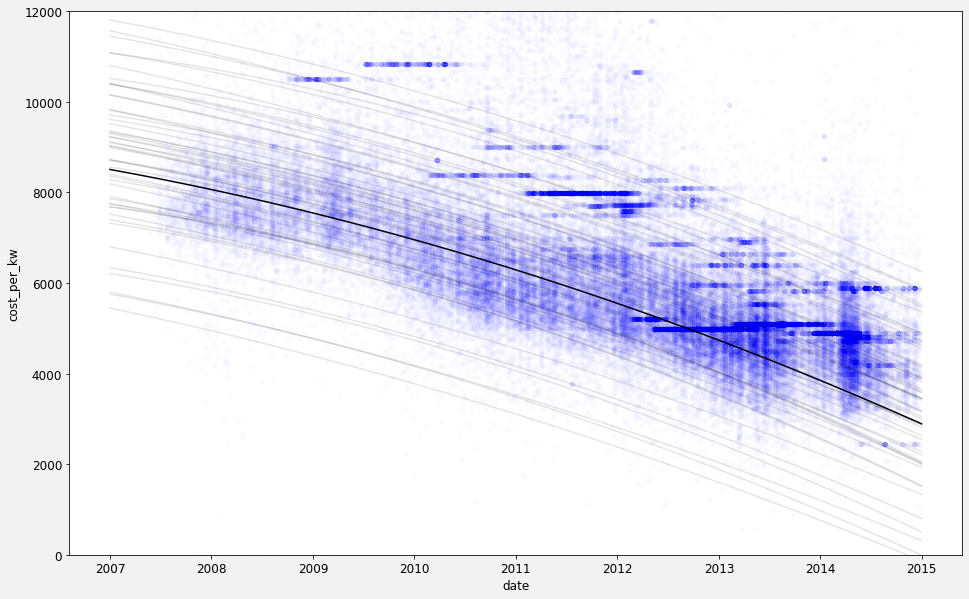

In [56]:
fig, ax = plt.subplots()
pv.plot.scatter("date", "cost_per_kw", alpha=.01, color="blue", ax=ax)
ax.set_ylim(0,12000)
ax.plot(fake_dates, y_line, color="black")


for i in range(nsim):
    y_line_sim = beta_sims[i][0] + beta_sims[i][1]*x_line_m + beta_sims[i][2]*x_line_m**2 + np.random.normal(0,sigma_hat)
    ax.plot(fake_dates, y_line_sim, color="black", alpha=.1)



Notice in the above, the inclusion of the generated uncertainty from the models standard error, $\sigma$ (*np.random.normal(0,sigma_hat)*)

In [41]:

mod6 = smf.ols("cost_per_kw~time_days_m + time_days_m_sq + china + sector + county_year_total + contractor_year_total", data=pv).fit()
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     6869.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:07:32   Log-Likelihood:            -9.2716e+05
No. Observations:              104992   AIC:                         1.854e+06
Df Residuals:                  104983   BIC:                         1.854e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6073.6634     41.978    144.689      0.000    5991.388    6155.939
sector[T.Government]   1570.6362     97.794     16.061      0.000    1378.961    1762.311
sector[T.Non-Profit]   -302.1678     96.112     -3.144      0.002    -490.547    -113.789
sector[T.Residential]   178.1444     41.783      4.264      0.000      96.251     260.038
time_days_m              -1.9835      0.013   -154.870      0.000      -2.009      -1.958
time_days_m_sq           -0.0003   1.21e-05    -27.128      0.000      -0.000      -0.000
china                  -310.5045     13.834    -22.445      0.000    -337.619    -283.390
county_year_total         0.0107      0.001     17.716      0.000       0.010       0.012
contractor_year_total     0.0020      0.001      3.249      0.001       0.001       0.003
==============================================================================
Omnibus:                   164758.802   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        632148803.528
Skew:                           9.326   Prob(JB):                         0.00
Kurtosis:                     382.677   Cond. No.                     1.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assignment

## 1.) leasing

In the PV data set consider the variable "lease", which is a binary variable that indicates whether a system is owned by the host (homeowner, business owner, etc) or whether the panel is leased. Take a subset of the data for the year 2012 and estimate the relationship between cost per kw and the size of the panel in kilowatts (kw)--*nameplate*.

a.) 

- Estimate the regression of cost per kw on the lease indicator and size of the panels (nameplate). 

- Plot the results of the regression overlayed the data. Interpret the results. 

b.) Include an interaction effect in the regression, plot the new results. Does there appear to be an interaction. 

c.) Now consider the variable *contractor_year_total*, which indicates how many installations the contractor of that sytem had installed in that year. We might postulate that there are economies of scale at the contractor scale, so that a contractor who has installed many panels will be able to provide a cheaper price. 

- Estimate a regression with the *contractor_year_total* variable
- Interpret the results.
- Plot the results. With these results, discuss the statistical and practical significance of these results. 

## 2.) Free problem. Choose your own data set (potentially one you have used in a previous exercise). 

- Run a regression with 2 or more explanatory variables, preferably one being an indicator variable. Interpret the results

- Plot one or more of the relationships from the regression model over a plot of the data.